In [1]:
from functions import *


import warnings
warnings.filterwarnings('ignore')

### Import a Dataset

In [2]:
data= loaddataset('dataset.csv', 'Z8RsBpxhnkebK5fvahVCmfV7icO2')

In [3]:
data.head()

,uid,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:00:00,77.0,0.0,0.0,0.0,0.0,0.0,90.82098,0.0,0.0,0.0,0.0,0.0,0.0
824,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:15:00,75.0,49.0,0.0,0.0,0.0,0.0,90.61686,0.0,0.0,0.0,0.0,0.0,0.0
825,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:30:00,73.0,71.0,0.0,0.0,0.0,0.0,86.22828,0.0,0.0,0.0,0.0,0.0,0.0
826,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:45:00,89.0,650.0,0.0,0.0,0.0,0.0,82.04382,0.0,0.0,0.0,0.0,0.0,0.0
827,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 13:00:00,97.0,393.0,0.0,0.0,0.0,0.0,79.90056,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = preprocess(data,1)

### The final dataset will be: 

In [5]:
data.head()

,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,77,0,0,0,0,0,90,0,0,0,0,0,0
824,75,49,0,0,0,0,90,0,0,0,0,0,0
825,73,71,0,0,0,0,86,0,0,0,0,0,0
826,89,650,0,0,0,0,82,0,0,0,0,0,0
827,97,393,0,0,0,0,79,0,0,0,0,0,0


In [6]:
len(data['sugarValue'].unique())

68

### Let’s create our model. We are trying to predict a patient diabetes value. This coincides with the ‘sugarValue’ column, which will be our independent variable. We’ll use all the other columns as features for our model.

In [7]:
X = data.drop('sugarValue', axis=1)
y = data['sugarValue']

### We’ll use train-test-split to split the data into training data and testing data, and create a random forest model.


### Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 


In [8]:
window = prediction(data,3,1, X, y)


--- 144.65026807785034 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [9]:
window

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 838,From: 839 to: 839,0.054385,0.233207,15Min 3PSW
1,From: 824 to: 839,From: 840 to: 840,50.410000,7.100000,15Min 3PSW
2,From: 825 to: 840,From: 841 to: 841,102.013746,10.100185,15Min 3PSW
3,From: 826 to: 841,From: 842 to: 842,87.455629,9.351771,15Min 3PSW
4,From: 827 to: 842,From: 843 to: 843,61.499807,7.842181,15Min 3PSW
...,...,...,...,...,...
22809,From: 1946 to: 2090,From: 2091 to: 2094,19.871423,4.457737,60Min 36PSW
22810,From: 1947 to: 2091,From: 2092 to: 2095,19.706140,4.439160,60Min 36PSW
22811,From: 1948 to: 2092,From: 2093 to: 2096,20.608542,4.539663,60Min 36PSW
22812,From: 1949 to: 2093,From: 2094 to: 2097,8.615062,2.935143,60Min 36PSW


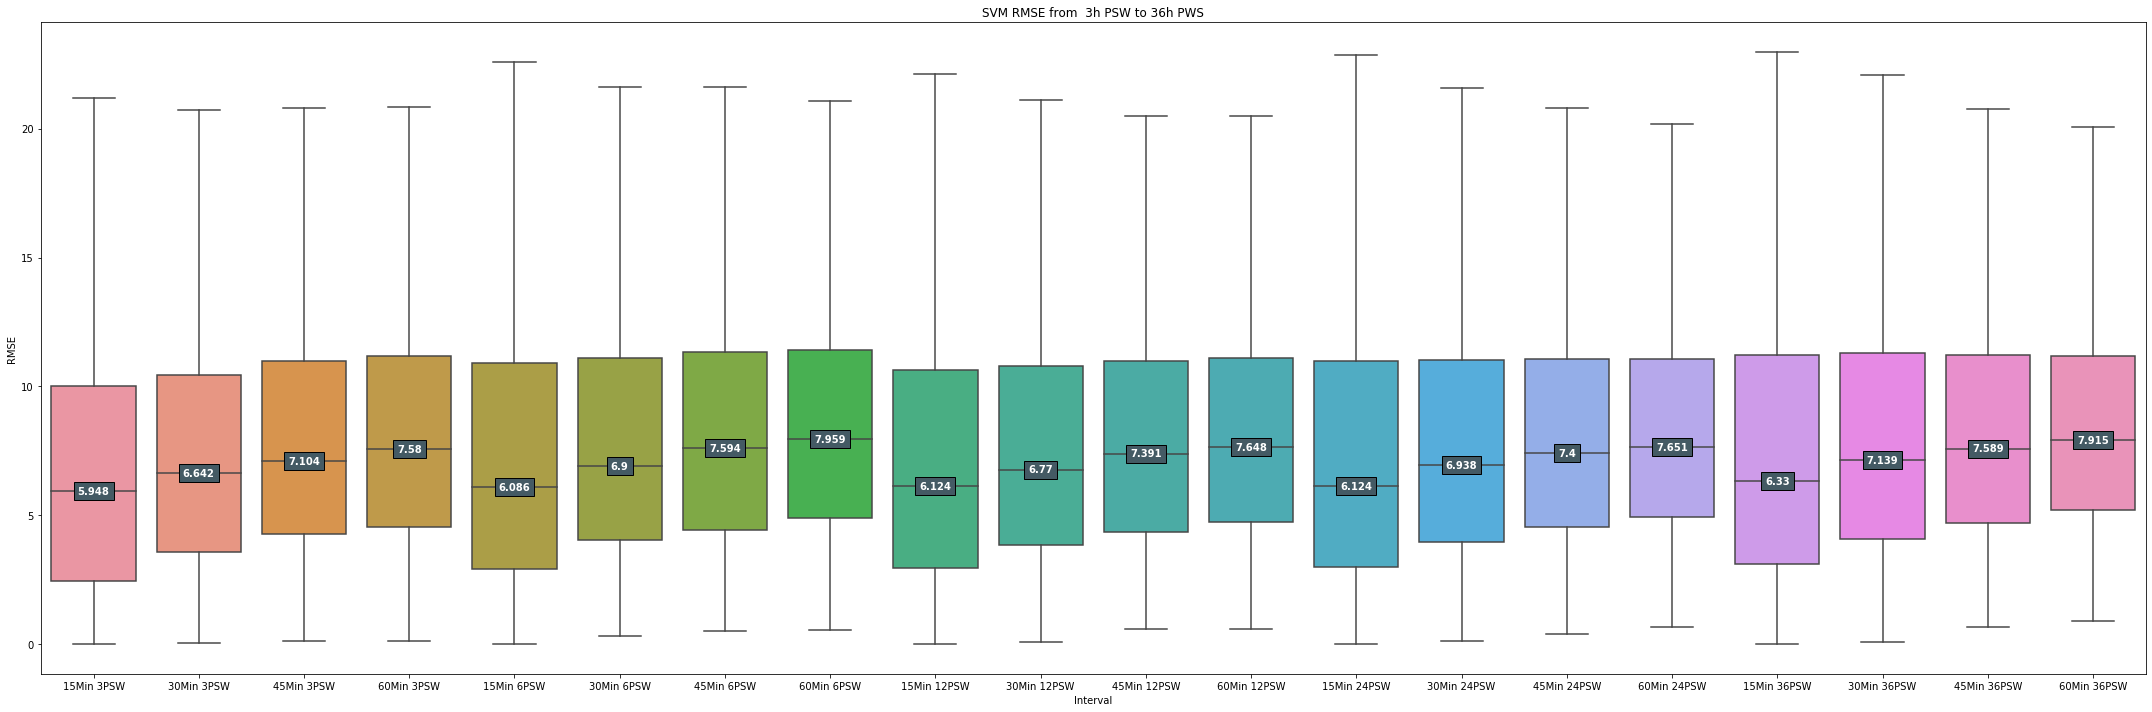

In [10]:
boxplot(window, "SVM",3,36)

## Let s try to increment the window from 36 hours max, to 72 hours max and increse the PH from 60min until 3 hours  

In [11]:
windowLong = prediction(data,3,2, X, y)


--- 537.2739615440369 Seconds for computation ---


In [12]:
windowLong

,Current train,Current test,MSE,RMSE,Interval
0,From: 823 to: 1032,From: 1033 to: 1033,14.713777,3.835854,15Min 48PSW
1,From: 824 to: 1033,From: 1034 to: 1034,142.090839,11.920186,15Min 48PSW
2,From: 825 to: 1034,From: 1035 to: 1035,78.545492,8.862589,15Min 48PSW
3,From: 826 to: 1035,From: 1036 to: 1036,161.253404,12.698559,15Min 48PSW
4,From: 827 to: 1036,From: 1038 to: 1038,51.953013,7.207844,15Min 48PSW
...,...,...,...,...,...
34609,From: 1793 to: 2082,From: 2083 to: 2094,58.484518,7.647517,180Min 72PSW
34610,From: 1794 to: 2083,From: 2084 to: 2095,59.128411,7.689500,180Min 72PSW
34611,From: 1795 to: 2084,From: 2085 to: 2096,58.864106,7.672295,180Min 72PSW
34612,From: 1796 to: 2085,From: 2086 to: 2097,57.383013,7.575158,180Min 72PSW


## Plot the RMSE in a box plot

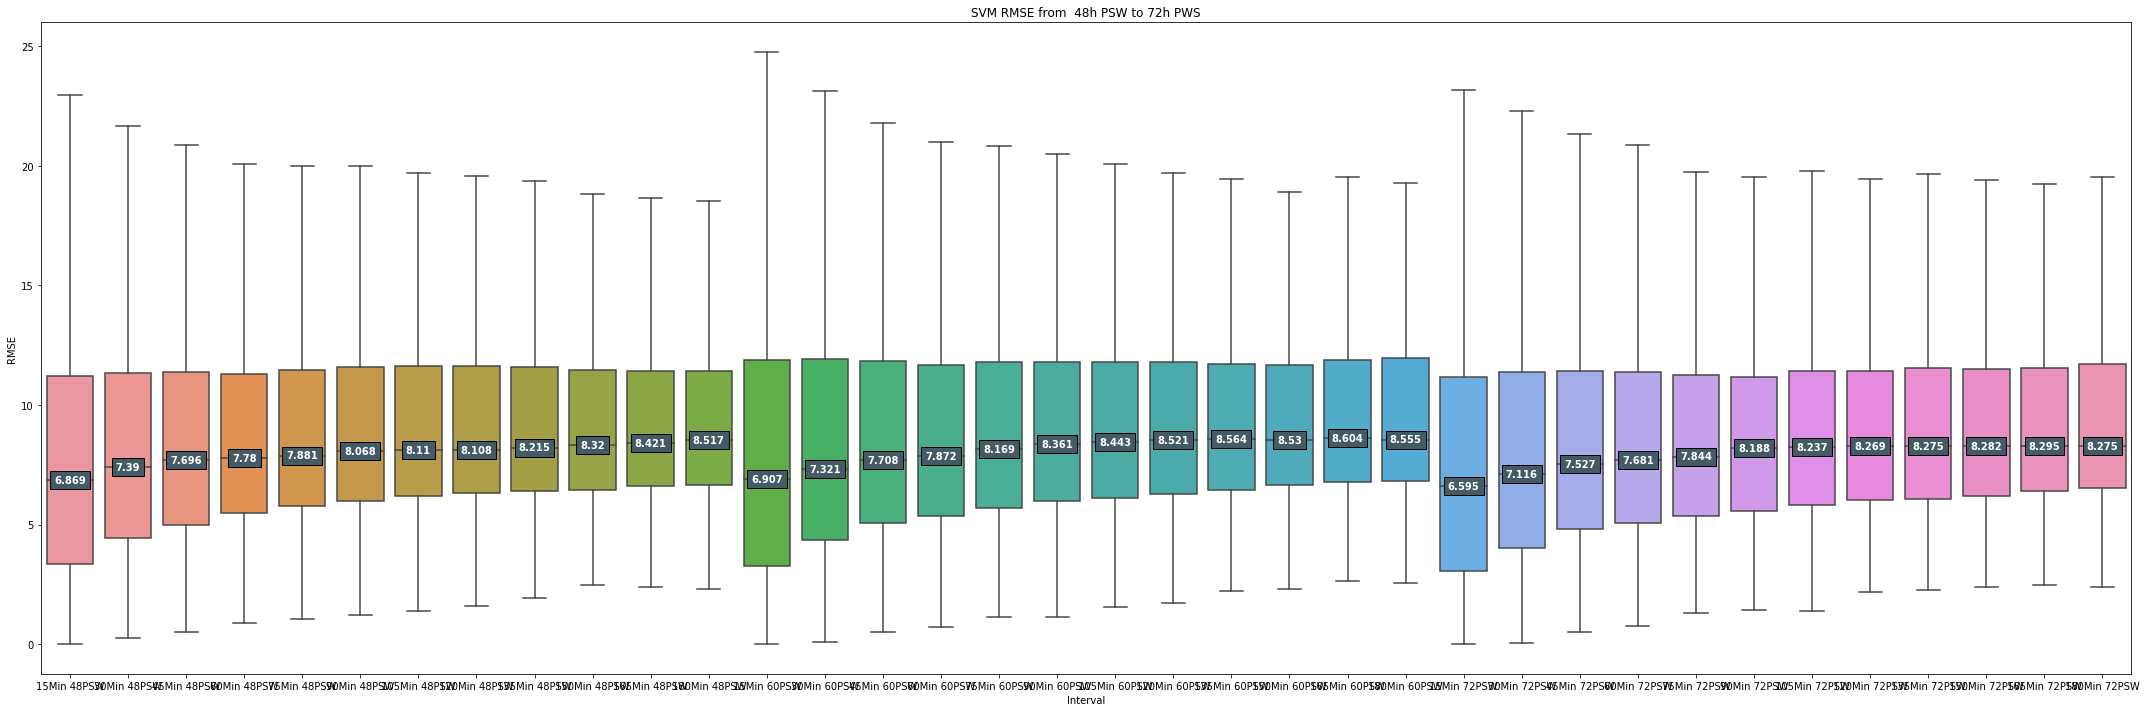

In [13]:
boxplot(windowLong, "SVM",48,72)